# Title: Time Series Analysis

Time series analysis is a statistical technique that deals with time series data, or trend analysis. Time series data means that data is in a series of particular time periods or intervals. The data is considered in three types: Time series data: A set of observations on the values that a variable takes at different times. Cross-sectional data: Data of one or more variables, collected at the same point in time. Pooled data: A combination of time series data and cross-sectional data. Time series analysis helps organizations to analyze:

- Is there any trend in the sales of the company?
- If there is any trend, what are the factors that are causing it?
- Forecasting the future values in the series.
- competitive analysis of the company.
- stock market analysis and much more.

Components of Time Series Data
1. trend - long term increase or decrease in the data over time (upward or downward movement in the data over time)
2. seasonality - seasonal variation (regular pattern of up and down movements in the data)

## Problem Statement
This time you are helping out Unicorn Investors with your data hacking skills. They are considering making an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.
 
You need to help Unicorn ventures with the decision. They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

## Metric
Root Mean Squre Error (RMSE) is the evaluation metric for this contest

## Hypothesis Generation
This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the hypothesis which I think can affect the passenger count (dependent variable for this problem) on JetRail:

- There will be an increase in the traffic as the years pass by.

Explanation - Population has a general upward trend with time, so I can expect the traffic will also increase with time.
- The traffic will be high from May to October.

Explanation - Tourist visits generally increases during this time period.
- Traffic on weekdays will be more as compared to weekends/holidays.

Explanation - People will go to office on weekdays and hence the traffic will be more
- Traffic during the peak hours will be high.

Explanation - People will travel to work, college.

We will try to validate each of these hypothesis based on the dataset. Now let's have a look at the dataset.



In [1]:
# importing the required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt#importing matplotlib for plotting graphs
import seaborn as sns#importing seaborn for plotting graphs
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from datetime import datetime #importing datetime for datetime object
from pandas import Series #importing series from pandas

In [2]:
# Now we will read the data set
train=pd.read_csv(r"C:\Users\admin\Desktop\my projects\Time series\Train_SU63ISt.csv")
test=pd.read_csv(r"C:\Users\admin\Desktop\my projects\Time series\Test_0qrQsBZ.csv")

# Now we will make a copy of the data set
train_original=train.copy()
test_original=test.copy()

Dataset Structure and Content
We have train and test data set, train data set has both the independent and dependent variable(s). You need to predict the traffic for test data set.

In [3]:
# view the columns in the data set
train.columns,test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

We have ID, Datetime and Traffic (passenger count) as columns in the dataset. For the test data we have only ID and Datetime column, we have to predict the traffic values for these IDs.

Let's understand each column in detail:

- ID: Unique ID given to each observation (Not a feature)
- Datetime: Datetime of observation (Not a feature)
- Count: Passenger count corresponding to each Datetime (Target/Dependent Variable)

In [4]:
# Now we will check the data types of the columns
train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object,
 ID           int64
 Datetime    object
 dtype: object)

* ID and Count are in integer format while the Datetime is in object format. We will need to change the format of Datetime column to datetime format, so as to extract features from it. We will extract the time and date from the Datetime column.

In [5]:
# Now we will check the shape of the data set
print(f'The shape of the train is {train.shape[0]} rows  {train.shape[1]} columns')
print(f'The shape of the test is {test.shape[0]} rows  {test.shape[1]} columns')

The shape of the train is 18288 rows  3 columns
The shape of the test is 5112 rows  2 columns


We have 18288 rows in train data set and 5112 in test data set.

Feature Extraction
We will extract the time and date from the Datetime column. We have seen earlier that the data type of Datetime is object. So first of all we have to change the data type to datetime format otherwise we can not extract features from it.

In [6]:
# converting the datetime object to datetime
train['Datetime']=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime']=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime']=pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime']=pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

# Now we will extract the year,month,day and hour from the datetime object
for i in (train,test,test_original,train_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['hour']=i.Datetime.dt.hour


We made a hypothesis regarding the traffic pattern on weekdays and weekends. So, let's make a weekend variable to visualize the impact of weekend on traffic.

We will first extract the day of week from Datetime and then based on the values we will assign whether the day is a weekend or not.

values of 5 and 6 represents that the days are weekend days.

In [7]:
# Now we will make a weekend variable to check whether the day is weekend or not
train['day of week']=train['Datetime'].dt.dayofweek
temp=train['Datetime']

# Now we will map the day of week with the actual names of the day
def applyer(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0
temp2=train['Datetime'].apply(applyer)
train['weekend']=temp2

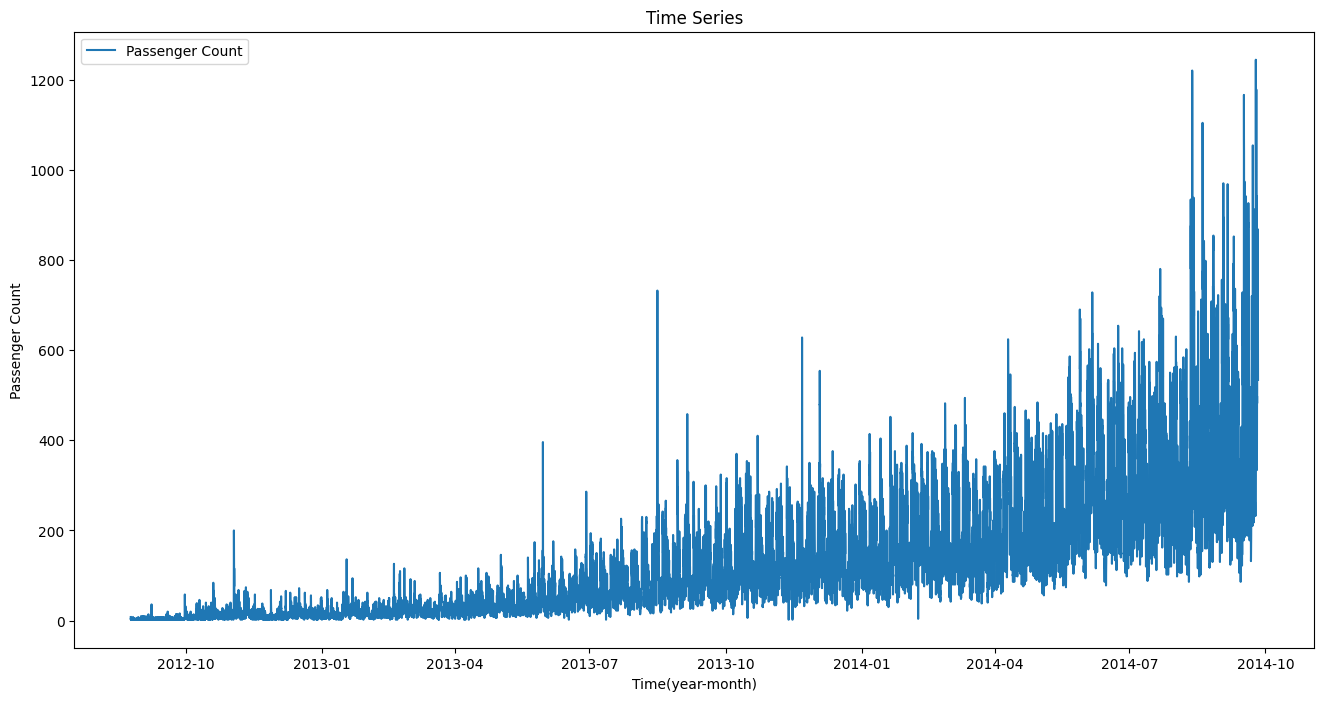

In [8]:
# Now we will check the time series of the data set
train.index=train['Datetime'] # indexing the datetime to get the time period on the x-axis
df=train.drop('ID',axis=1) # drop ID variable to get only the Datetime on x-axis
ts=df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts,label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger Count')
plt.legend(loc='best');

Here We can infer that there is an increasing trend in the series,the number of count is increasing with respect to time. We can also see that at certain points there is sudden increase in the number of counts. The possible reason behind this could be due to some holiday or festival which generally leads to more passengers.

We will work on the train data for all the analysis and will use the test data for forecasting.

## Exploratory Data Analysis
Let us try to verify our hypothesis using the actual data.

Our first hypothesis was traffic will increase as the years pass by. So let's look at yearly passenger count.

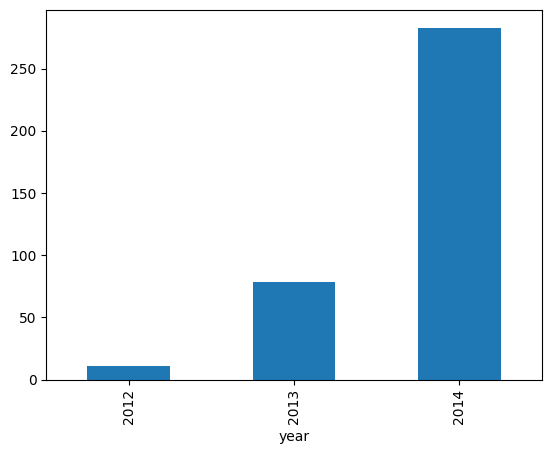

In [9]:
# year wise count of the passengers
train.groupby('year')['Count'].mean().plot.bar();

We see an exponential growth in the traffic with respect to year which validates our hypothesis.

Our second hypothesis was about increase in traffic from May to October. So, let's see the relation between count and month.

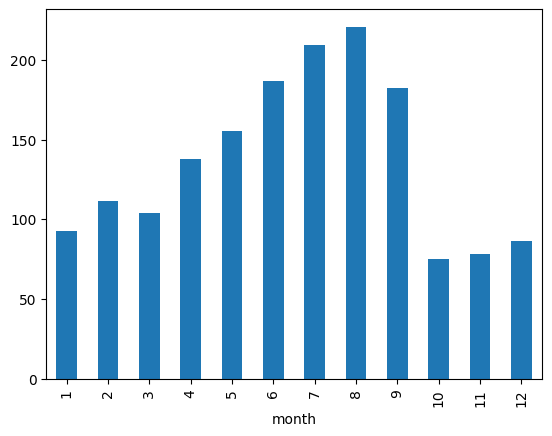

In [10]:
# month wise count of the passengers
train.groupby('month')['Count'].mean().plot.bar();

Here we see a decrease in the mean of passenger count in last three months. This does not look right. Let's look at the monthly mean of each year separately.

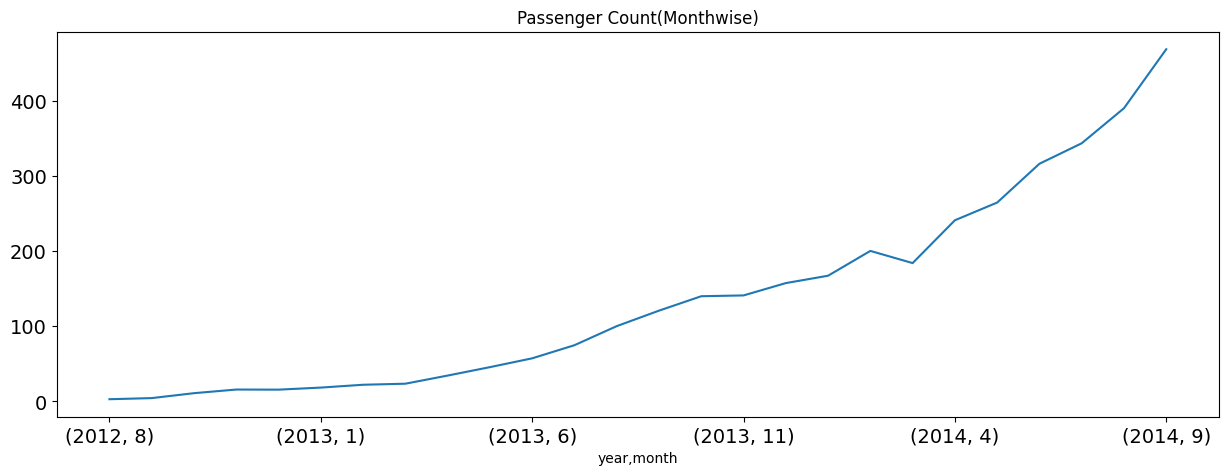

In [11]:
# monthly mean of each year
temp=train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(15,5),title='Passenger Count(Monthwise)',fontsize=14);


* We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months for year 2012 is also very less. This explains the sudden drop in the monthly mean.

* Since there is an increasing trend in our time series, the mean value for the rest of the months would be more because of the large number of passennger count in 2014 and will get smaller value for these 3 months.

* In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.

Let's look at the daily mean of passenger count.

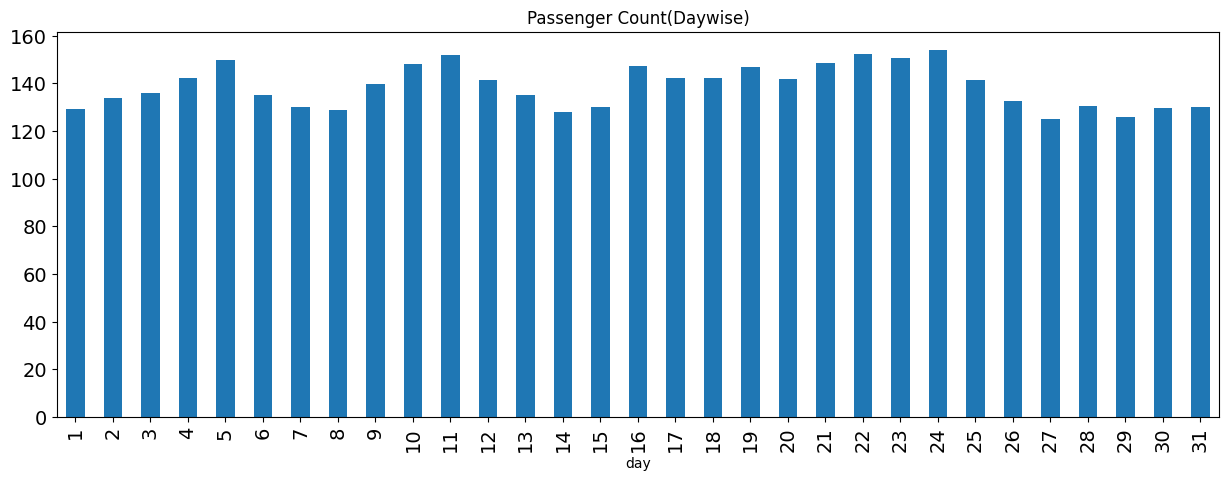

In [12]:
# Now we will check the daily mean of the passenger count
train.groupby('day')['Count'].mean()\
    .plot.bar(figsize=(15,5),title='Passenger Count(Daywise)',fontsize=14);

We are not getting much insights from day wise count. 

We also made a hypothesis that the traffic will be more during peak hours. So let's see the mean of hourly passenger count.

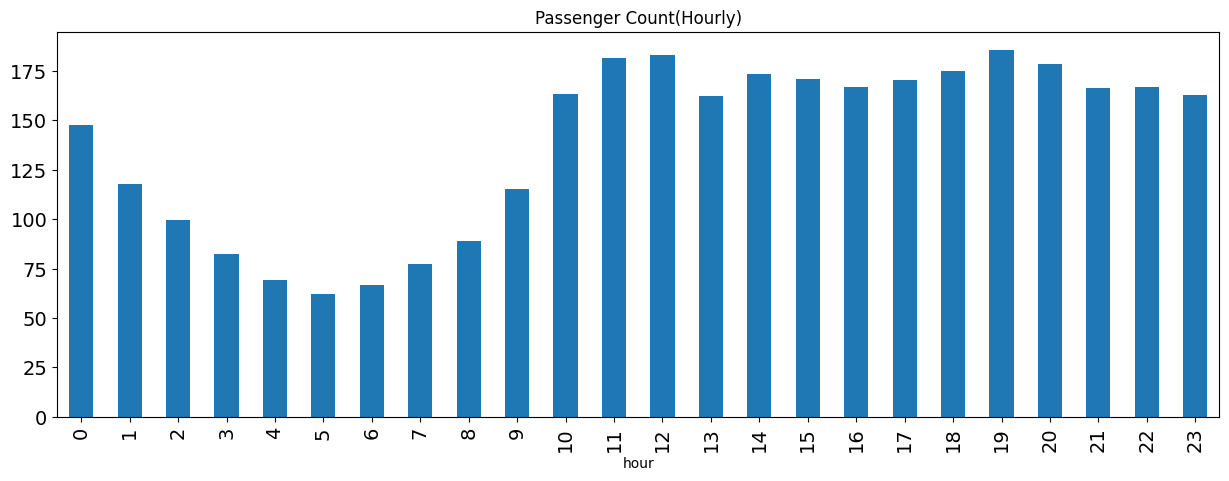

In [13]:
# Now we will check the hourly mean of the passenger count
train.groupby('hour')['Count'].mean()\
    .plot.bar(figsize=(15,5),title='Passenger Count(Hourly)',fontsize=14);

* It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM
* After that the passenger count starts increasing again and peaks between 11 AM and 12 Noon.

Lets try to validate our hypothesis which we assumed that the traffic will be more on weekdays.

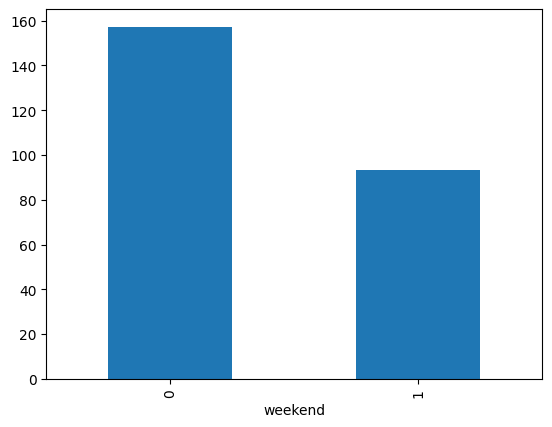

In [14]:
# lets view by weekdays
train.groupby('weekend')['Count'].mean().plot.bar();


It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.

Let's look at the day wise passenger count.

Note - 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.

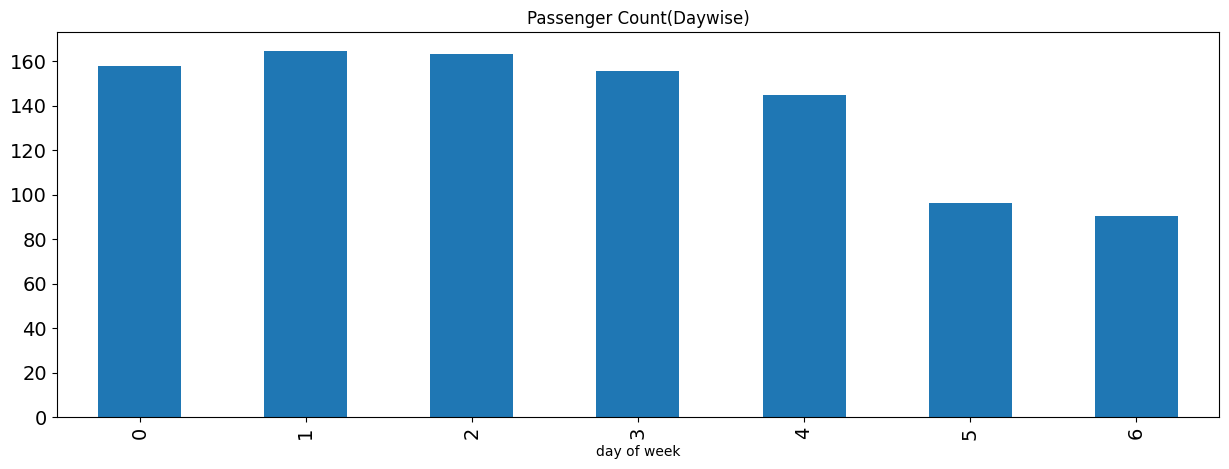

In [15]:
# Now we will check the daily mean of the passenger count
train.groupby('day of week')['Count'].mean()\
    .plot.bar(figsize=(15,5),title='Passenger Count(Daywise)',fontsize=14);

From the above barplot we can infer that the passenger count is less on weekends as compared to weekdays which validates our hypothesis. Now we will look at basic modeling techniques. 

Before that we will drop the ID variable as it has nothing to do with the passenger count.


In [16]:
# dropping the ID variable
train=train.drop('ID',axis=1)

As we have seen that there is alot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

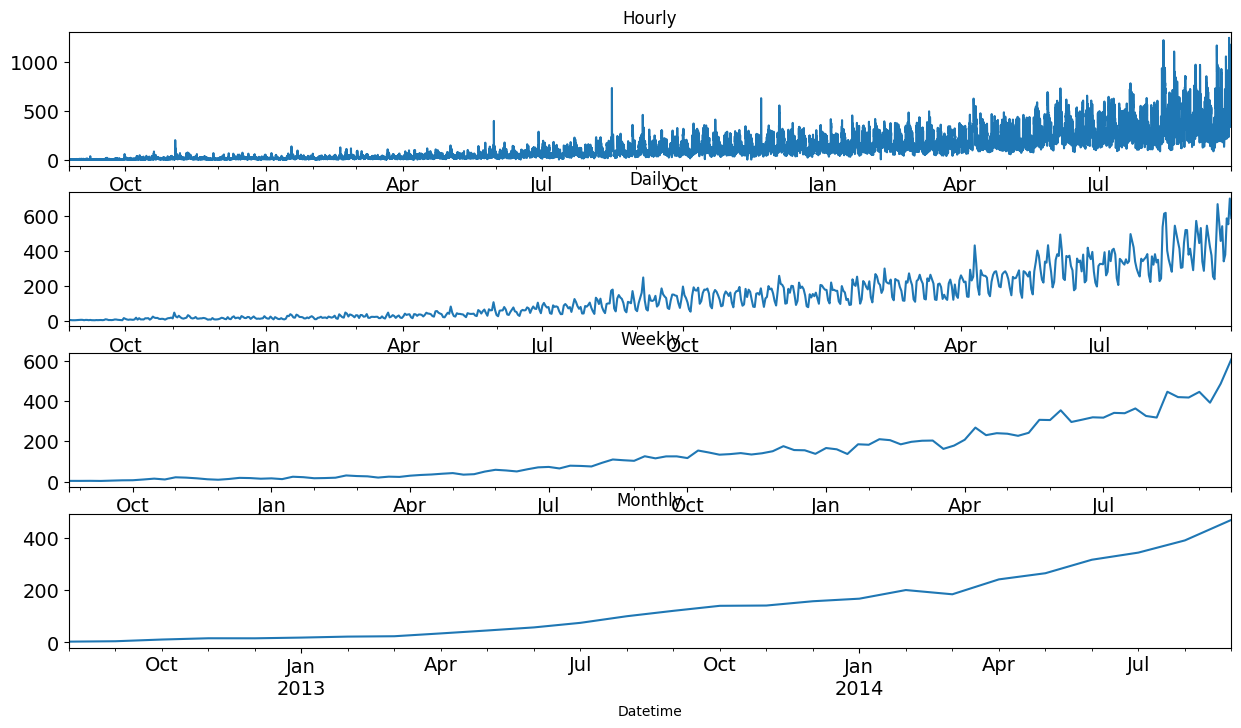

In [17]:
# aggregating the hourly time series to daily,weekly,monthly
train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index=train.Timestamp

# hourly time series
hourly=train.resample('H').mean()
# converting to daily mean
daily=train.resample('D').mean()
# converting to weekly mean
weekly=train.resample('W').mean()
# converting to monthly mean
monthly=train.resample('M').mean()

# Now we will plot the time series
fig,axs=plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8),title='Hourly',fontsize=14,ax=axs[0])
daily.Count.plot(figsize=(15,8),title='Daily',fontsize=14,ax=axs[1])
weekly.Count.plot(figsize=(15,8),title='Weekly',fontsize=14,ax=axs[2])
monthly.Count.plot(figsize=(15,8),title='Monthly',fontsize=14,ax=axs[3])
plt.show();

We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which is a lot of hassle. So, we will only consider the daily time series for forecasting.

In [18]:
# daily time series
train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index=train.Timestamp
test.Timestamp=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test.index=test.Timestamp

# converting to daily mean
train=train.resample('D').mean()
test=test.resample('D').mean()


## Modeling Techniques

1. split the data into training and validation part and we will train our model on the training part and make predictions for the validation part and validate our predictions using the RMSE metric. To divide the data into training and validation set, we will take last 3 months as the validation data and rest in the training data. We will make predictions for the test data provided in the problem statement after training our model on the entire train data.

In [20]:
# splitting the data into training and validation part
Train=train.loc['2012-08-25':'2014-06-24']

# splitting the data into validation part
valid=train.loc['2014-06-25':'2014-09-25']


* we have done time based validation here by selecting the last 3 months for the validation data and rest in the training data. If we would have done it randomly then there would have been a high possiblity that the validation data would have some data from the future which would result in wrong validation and we would not be able to identify the true error rate. So, always perform time based validation for time series problems.

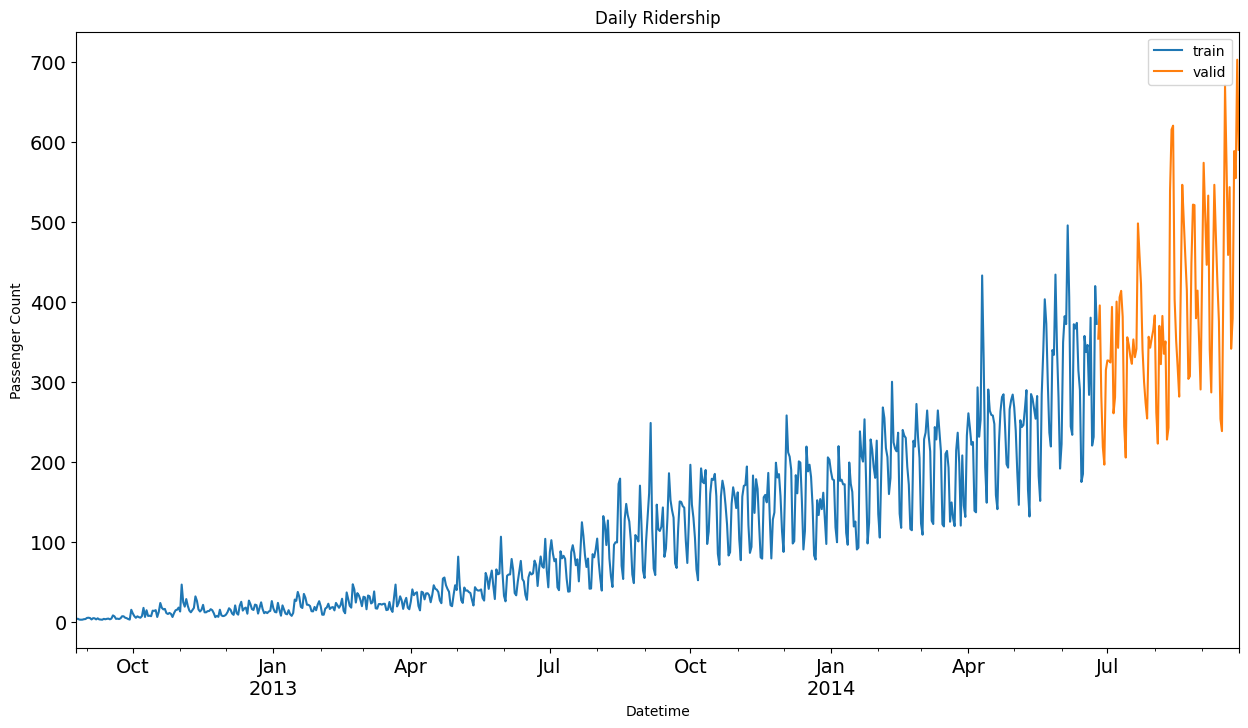

In [21]:
# plot how the train and validation part looks like
Train.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='train')
valid.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.legend(loc='best')
plt.show();

Here the blue part represents the train data and the orange part represents the validation data.

We will predict the traffic for the validation part and then visualize the predicted values along with the actual values to see how close we were to the actual values. Finally we will make predictions for the test dataset.

1. Naive Approach - In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction.

Let's make predictions using naive approach for the validation set.

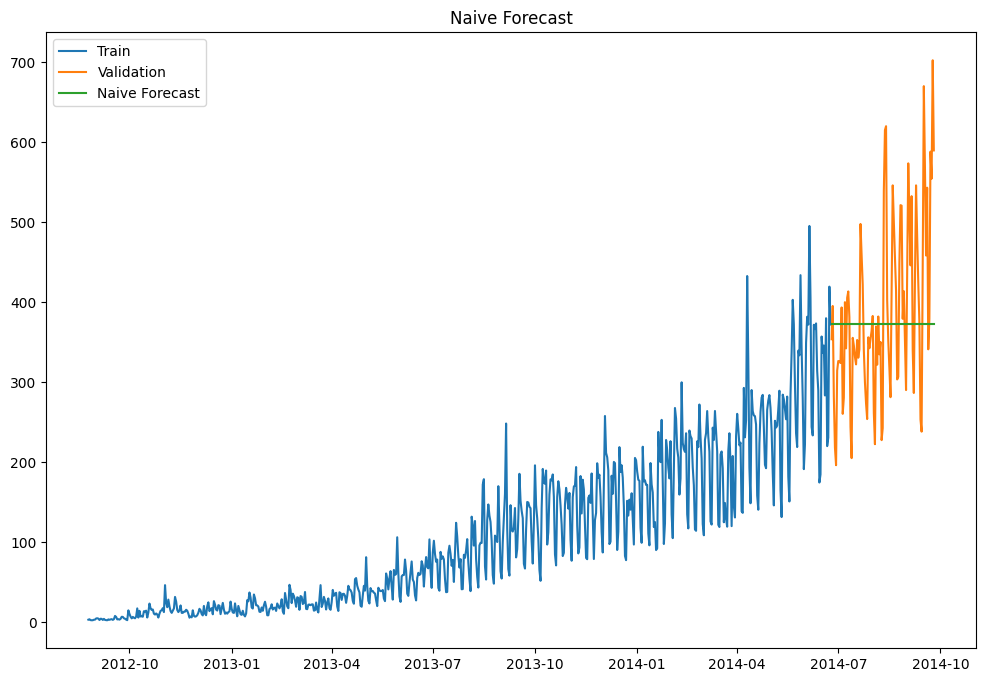

In [22]:
# Now we will make predictions using the naive approach
dd=np.asarray(Train.Count) # converting the train data to an array
y_hat=valid.copy() # making a copy of the validation data
y_hat['naive']=dd[len(dd)-1] # assigning the last value of the train data to the validation data
plt.figure(figsize=(12,8))
plt.plot(Train.index,Train['Count'],label='Train')
plt.plot(valid.index,valid['Count'],label='Validation')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show();

* We can calculate how accurate our predictions are using rmse(Root Mean Squared Error) metric.
* RMSE is the standard deviation of the residuals.
* Residuals are a measure of how far from the regression line data points are, RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

* The lesser the RMSE value, the better is the model performance.

* Let's calculate the RMSE for the predictions made using naive approach.

In [23]:
# Now we will calculate the RMSE to check the accuracy of our model on validation data set
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(valid.Count,y_hat.naive))
print(f'The RMSE value on the validation data set is {rms}')

The RMSE value on the validation data set is 111.79050467496724


We can infer that this method is not suitable for datasets with high variability. We can reduce the rmse value by adopting different techniques.

2. Moving Average - In this technique we will take the average of the passenger counts for last few time periods only.

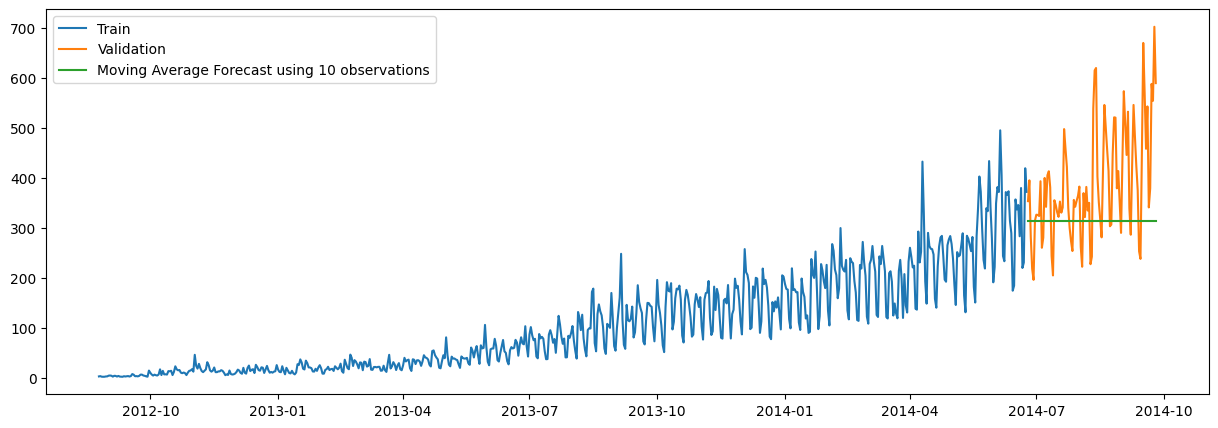

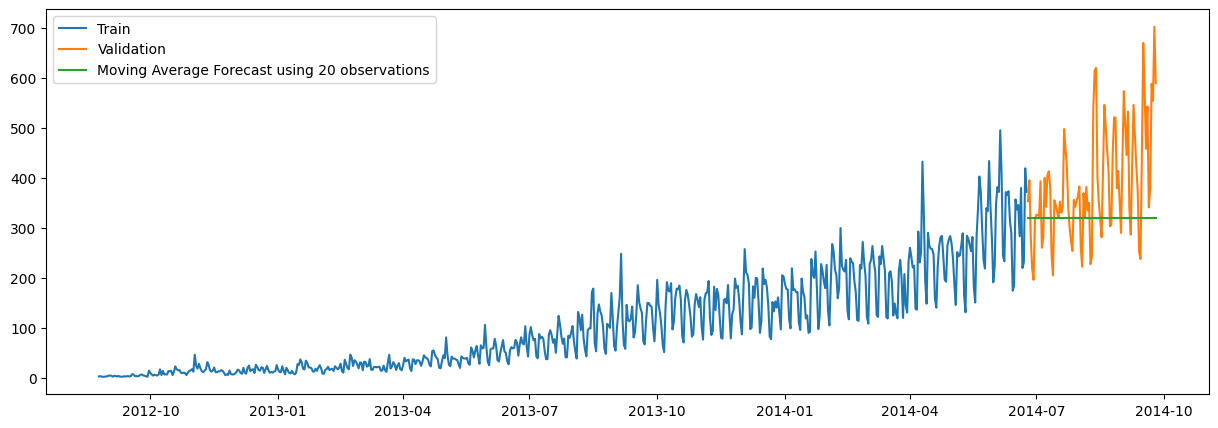

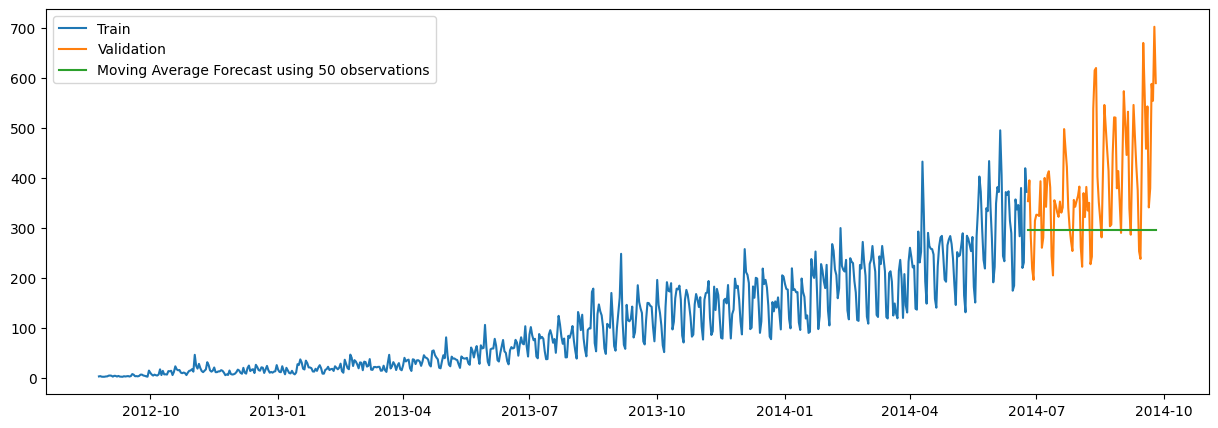

In [24]:
# Now we will make predictions using the moving average approach
y_hat_avg=valid.copy()
y_hat_avg['moving_avg_forecast']=Train['Count'].rolling(10).mean().iloc[-1] # calculating the mean of last 10 observations
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Validation')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show();

# make prediction for 20 observations
y_hat_avg=valid.copy()
y_hat_avg['moving_avg_forecast']=Train['Count'].rolling(20).mean().iloc[-1] # calculating the mean of last 20 observations
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Validation')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show();

# make prediction for 50 observations
y_hat_avg=valid.copy()
y_hat_avg['moving_avg_forecast']=Train['Count'].rolling(50).mean().iloc[-1] # calculating the mean of last 50 observations
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Validation')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show();

We took the average of passenger counts for last 10, 20, 50 and 100 time periods and predicted based on that. We can see that the predictions are getting weaker as we increase the number of time periods for calculating the moving average.

Let's check the rmse values for the predictions.

In [25]:
# Now we will calculate the RMSE to check the accuracy of our model on validation data set
rms=sqrt(mean_squared_error(valid.Count,y_hat_avg.moving_avg_forecast))
print(f'The RMSE value on the validation data set is {rms}')

The RMSE value on the validation data set is 144.19175679986793


3. Simple Exponential Smoothing - In this technique, we assign larger weights to more recent observations than to observations from the distant past. The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

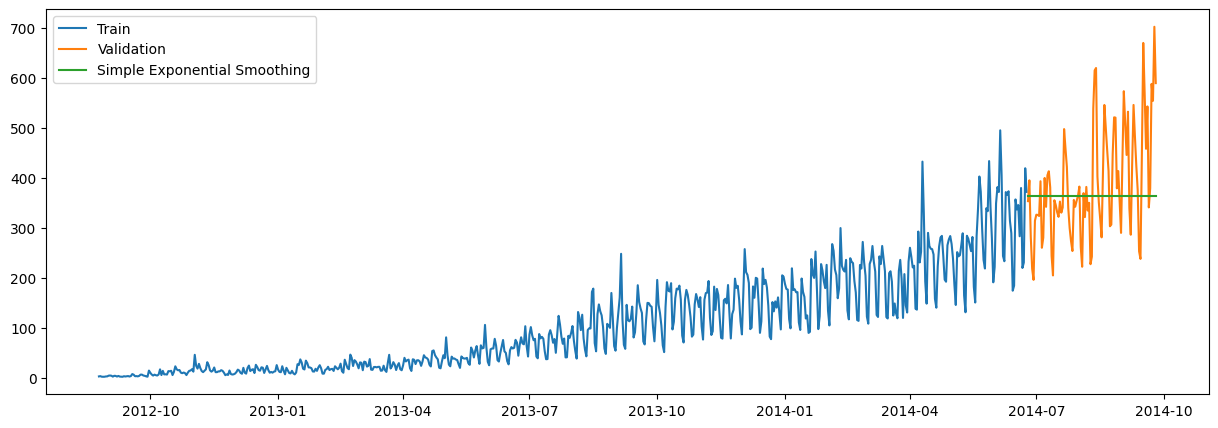

In [26]:
# Now we will make predictions using the simple exponential smoothing approach
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
y_hat_avg=valid.copy()
fit2=SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False) # fitting the model
y_hat_avg['SES']=fit2.forecast(len(valid)) # forecasting the values
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Validation')
plt.plot(y_hat_avg['SES'],label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.show();

In [27]:
# Now we will calculate the RMSE to check the accuracy of our model on validation data set
rms=sqrt(mean_squared_error(valid.Count,y_hat_avg.SES))
print(f'The RMSE value on the validation data set is {rms}')

The RMSE value on the validation data set is 113.43708111884514


We can infer that the fit of the model has improved as the rmse value has reduced.

4. Holt's Linear Trend Model - It is an extension of simple exponential smoothing to allow forecasting of data with a trend. This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.

First of all let us visualize the trend, seasonality and error in the series.

We can decompose the time series in four parts.

- Observed, which is the original time series.
- Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
- Seasonal, which tells us about the seasonality in the time series.
- Residual, which is obtained by removing any trend or seasonality in the time series.

Lets visualize the trend, seasonality and error in the series.

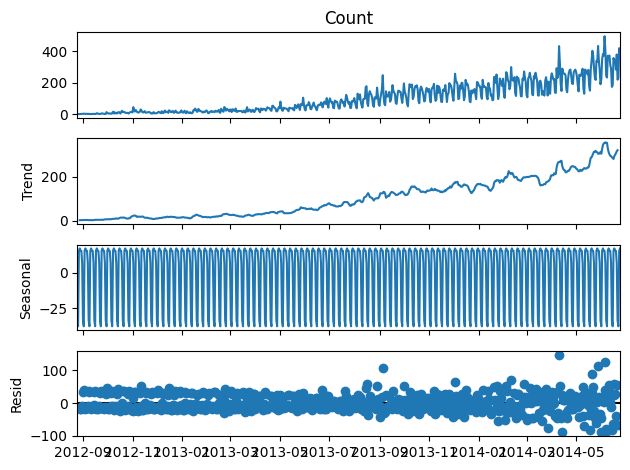

In [28]:
# visualizing the trend and seasonality in the data set
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result=sm.tsa.stattools.adfuller(train.Count) # performing the adfuller test
plt.show();

An increasing trend can be seen in the dataset, so now we will make a model based on the trend.

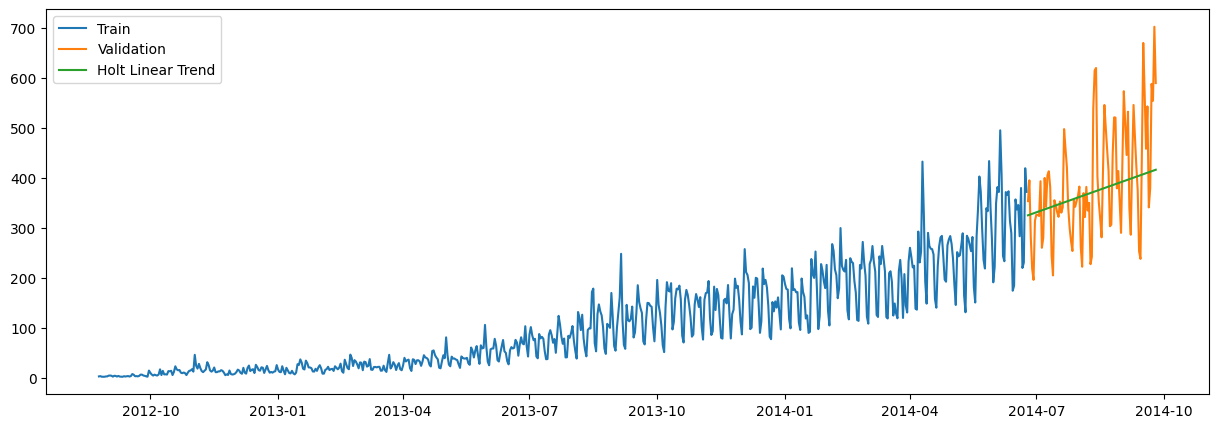

In [30]:
# Now we will make predictions using the Holt's linear trend approach
y_hat_avg=valid.copy()
fit1=Holt(np.asarray(Train['Count'])).fit() # fitting the model
y_hat_avg['Holt_linear']=fit1.forecast(len(valid)) # forecasting the values
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Validation')
plt.plot(y_hat_avg['Holt_linear'],label='Holt Linear Trend')
plt.legend(loc='best')
plt.show();

We can see an inclined line here as the model has taken trend into account. Now we will make a model based on both trend and seasonality.

In [31]:
# Now we will calculate the RMSE to check the accuracy of our model on validation data set
rms=sqrt(mean_squared_error(valid.Count,y_hat_avg.Holt_linear))
print(f'The RMSE value on the validation data set is {rms}')

The RMSE value on the validation data set is 101.10366878788804


It can be inferred that the rmse value has reduced as compared to the previous models and the graph has also become more stable.

Now we will be predicting the passenger counts for test data using various models.

Holts Linear Trend Model on daily time series
* Try to make holts linear trend model on daily time series and make predictions on the test data.
* We will make predctions based on the daily time series and then will distribute it to hourly predictions.
* We have fitted the holt's linear trend model on the train data and validated it using validation data.

Now let load the submission file.

In [35]:
# submission for the Holt's linear trend approach
submission=pd.read_csv(r"C:\Users\admin\Desktop\my projects\Time series\sample_submission_LSeus50.csv")

# Now we will make predictions using the Holt's linear trend approach
predict=fit1.forecast(len(test))

# converting the predictions to dataframe
test['prediction']=predict

# calculating the hourly ratio of count
train_original['ratio']=train_original['Count']/train_original['Count'].sum()

# grouping the hourly ratio
temp=train_original.groupby(['hour'])['ratio'].sum()

# groupby to csv format
pd.DataFrame(temp,columns=['hour','ratio']).to_csv('GROUPby.csv')

temp2=pd.read_csv('GROUPby.csv')
temp2=temp2.drop('hour.1',axis=1)

# merging test and test_original on day,month and year
merge=pd.merge(test, test_original, on=('day','month','year'), how='left')
merge['hour']=merge['hour_y']
merge=merge.drop(['year','month','Datetime_x','Datetime_y','hour_x','hour_y'],axis=1)

# predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='hour', how='left')

# converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

# drop all the features other than ID and Count
submission=prediction.drop(['ID_x','day','ID_y','prediction','hour','ratio'],axis=1)

# converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')


# 

Holts Winter Model on daily time series
* Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.
* The above methods dont take into account the seasonality of the dataset while forecasting. So, now we will look at the models which take into account both trend and seasonality to forecast future prices.
* The idea behind Holt's Winter is to apply exponential smoothing to the seasonal components in addition to level and trend.

Lets fit the model on training dataset and validate it using validation dataset.

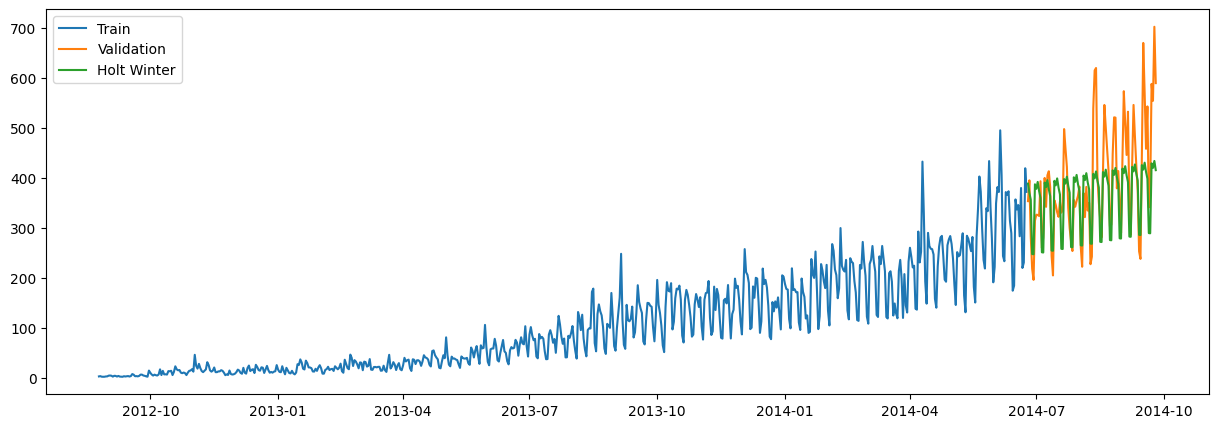

In [38]:
# Now we will make predictions using the Holt's winter approach
y_hat_avg=valid.copy()
fit1=ExponentialSmoothing(np.asarray(Train['Count']),seasonal_periods=7,trend='add',seasonal='add').fit() # fitting the model
y_hat_avg['Holt_Winter']=fit1.forecast(len(valid)) # forecasting the values
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Validation')
plt.plot(y_hat_avg['Holt_Winter'],label='Holt Winter')
plt.legend(loc='best')
plt.show();

In [39]:
# Now we will calculate the RMSE to check the accuracy of our model on validation data set
rms=sqrt(mean_squared_error(valid.Count,y_hat_avg.Holt_Winter))
print(f'The RMSE value on the validation data set is {rms}')

The RMSE value on the validation data set is 81.94800188083322


We can see that the rmse value has reduced further as compared to the previous models and the graph has also become more stable.

Now we will make predictions for the test dataset.

In [40]:
# prediction on the test data set
predict=fit1.forecast(len(test))

# merging the test and test_original on day,month and year
test['prediction']=predict
merge=pd.merge(test, test_original, on=('day','month','year'), how='left')
merge['hour']=merge['hour_y']
merge=merge.drop(['year','month','Datetime_x','Datetime_y','hour_x','hour_y'],axis=1)

# predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='hour', how='left')

# converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

# converting the final submission to csv format
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','hour','ratio','prediction','ID_x','ID_y'],axis=1)

# converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')


Arima Model on daily time series - ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA: p (past values used for forecasting the next value), q (past forecast errors used to predict the future values) and d (order of differencing).

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

There are three basic criterion for a series to be classified as stationary series : The mean of the series should not be a function of time. It should be constant. The variance of the series should not be a function of time. This property is known as homoscedasticity. Homoscedasticity is tested using a statistical test called Levene's Test. The covariance of the i th term and the (i + m) th term should not be a function of time.

If time series is not stationary, we have to make it stationary using differencing. we need to remove the trend and seasonality from the time series to make it stationary.

Stationary check
* We use Dickey Fuller test to check whether a time series is stationary or not.
* The intuition behind this test is that it determines how strongly a time series is defined by a trend.
* The null hypothesis of the test is that time series is not stationary (has some time-dependent structure).
* The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

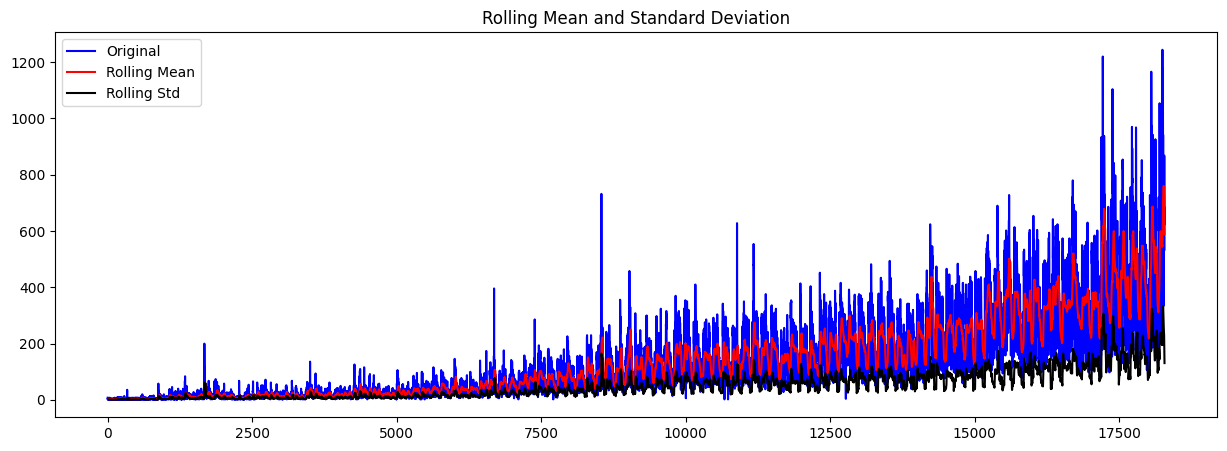

Results of Dickey Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [70]:
# function to calculate the Dickey Fuller test result
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # determining rolling statistics
    rolmean=timeseries.rolling(24).mean()
    rolstd=timeseries.rolling(24).std()
    # plot rolling statistics
    plt.figure(figsize=(15,5))
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling Mean')
    std=plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    # perform Dickey Fuller test
    print('Results of Dickey Fuller Test:')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

# test the function
test_stationarity(train_original[['Count']])

The statistics show that the time series is stationary as test statistic value is less than the critical value, but we can see an increasing trend in the data. So, let's make the time series stationary by removing trend and seasonality.

Removing Trend 
* A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear.
* We see an increasing trend in the data so we can apply transformation which penalizes higher values more than smaller ones, for example log transformation.
* we will take rolling average here to remove the trend. We will take the window size of 24 based on the fact that each day has 24 hours.

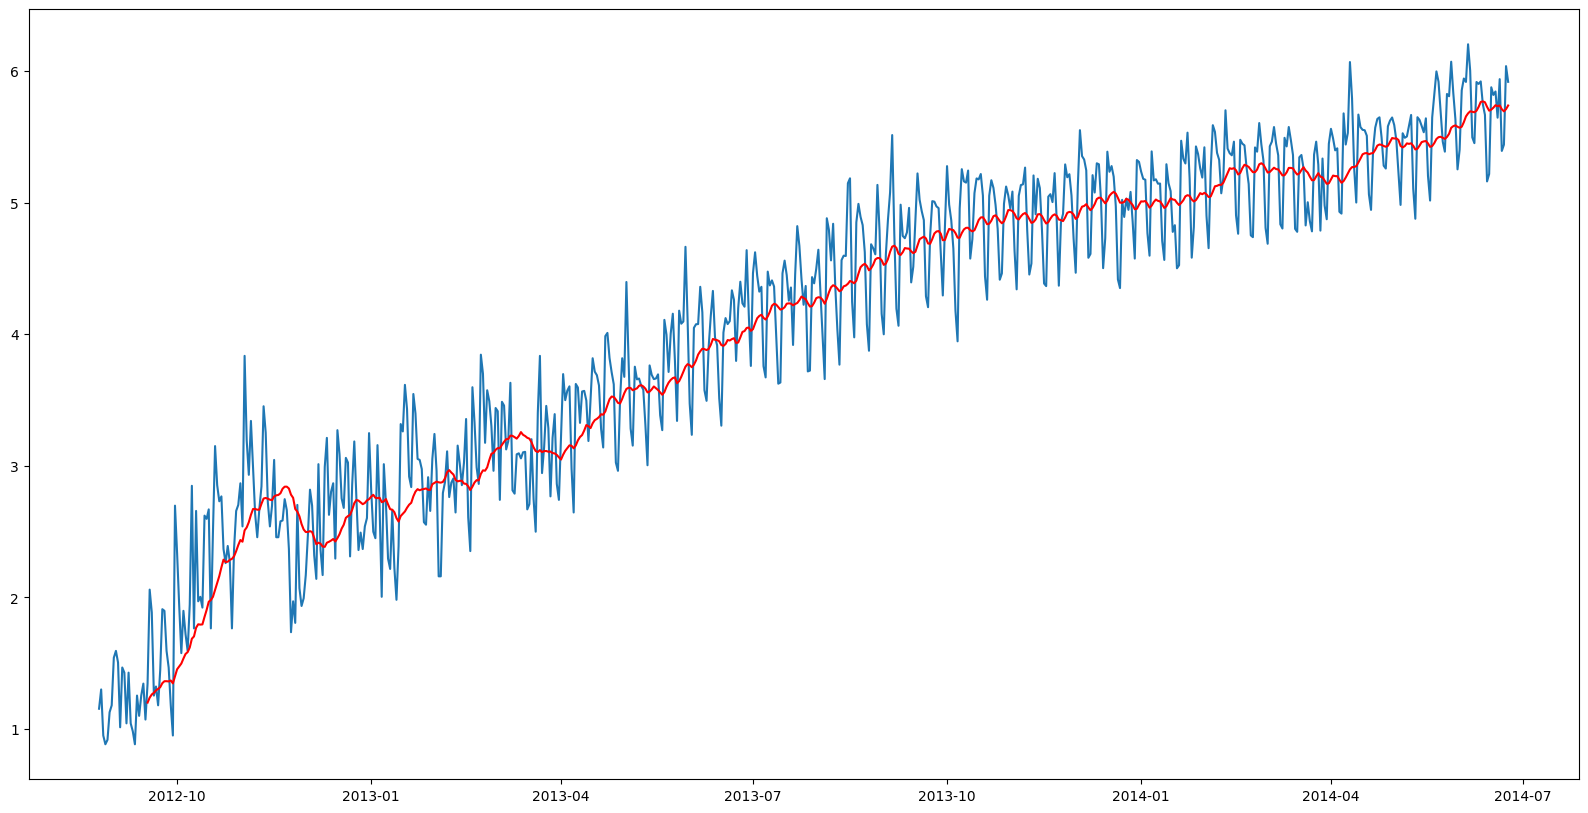

In [71]:
# log transformation
Train_log=np.log(Train['Count'])
valid_log=np.log(valid['Count'])

# moving average
moving_avg=Train_log.rolling(window=24).mean()
plt.plot(Train_log)
plt.plot(moving_avg,color='red');


we can see an increasing trend. We will remove this increasing trend to make our time series stationary.


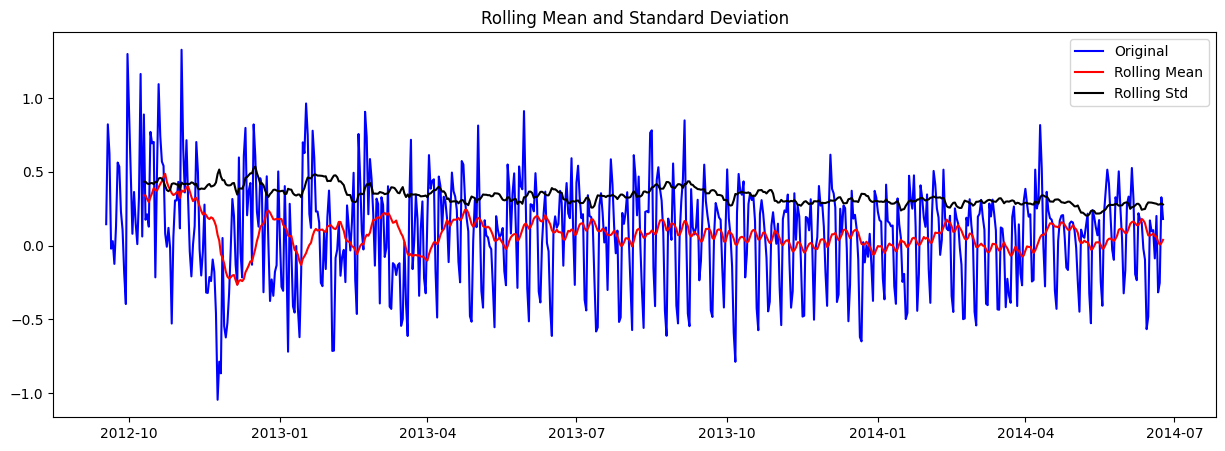

Results of Dickey Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [72]:
# removing the trend
train_log_moving_avg_diff=Train_log-moving_avg

# dropping the NaN values
train_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(train_log_moving_avg_diff)

Lets stablize the mean of the time series which is also a requirement of a stationary time series. Differencing can help to make the series stable and eliminate the trend.

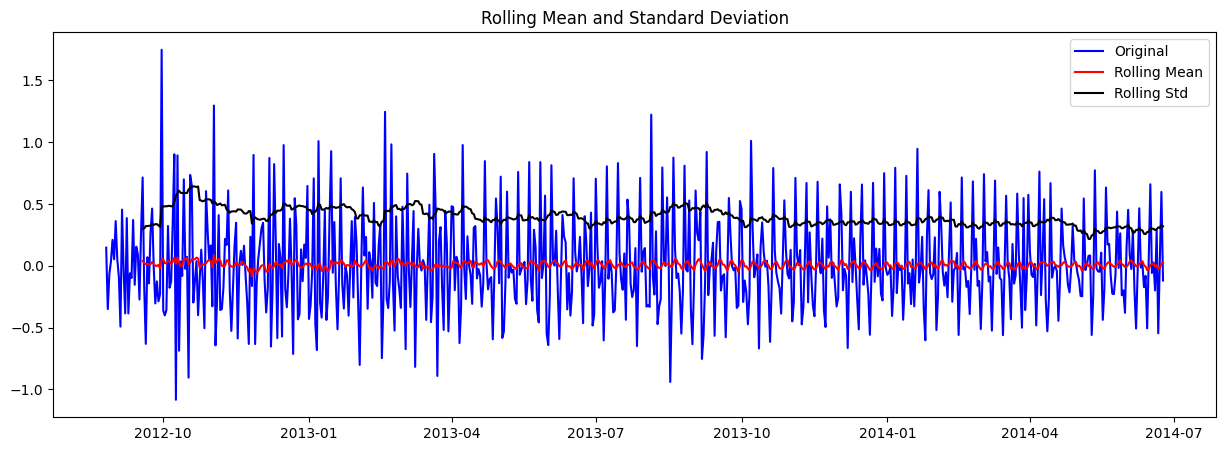

Results of Dickey Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [73]:
# log transformation
train_log_diff=Train_log-Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

Removing Seasonality
* By seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).
* Seasonality is always of a fixed and known period.
* We will use seasonal decompose to decompose the time series into trend, seasonality and residuals.

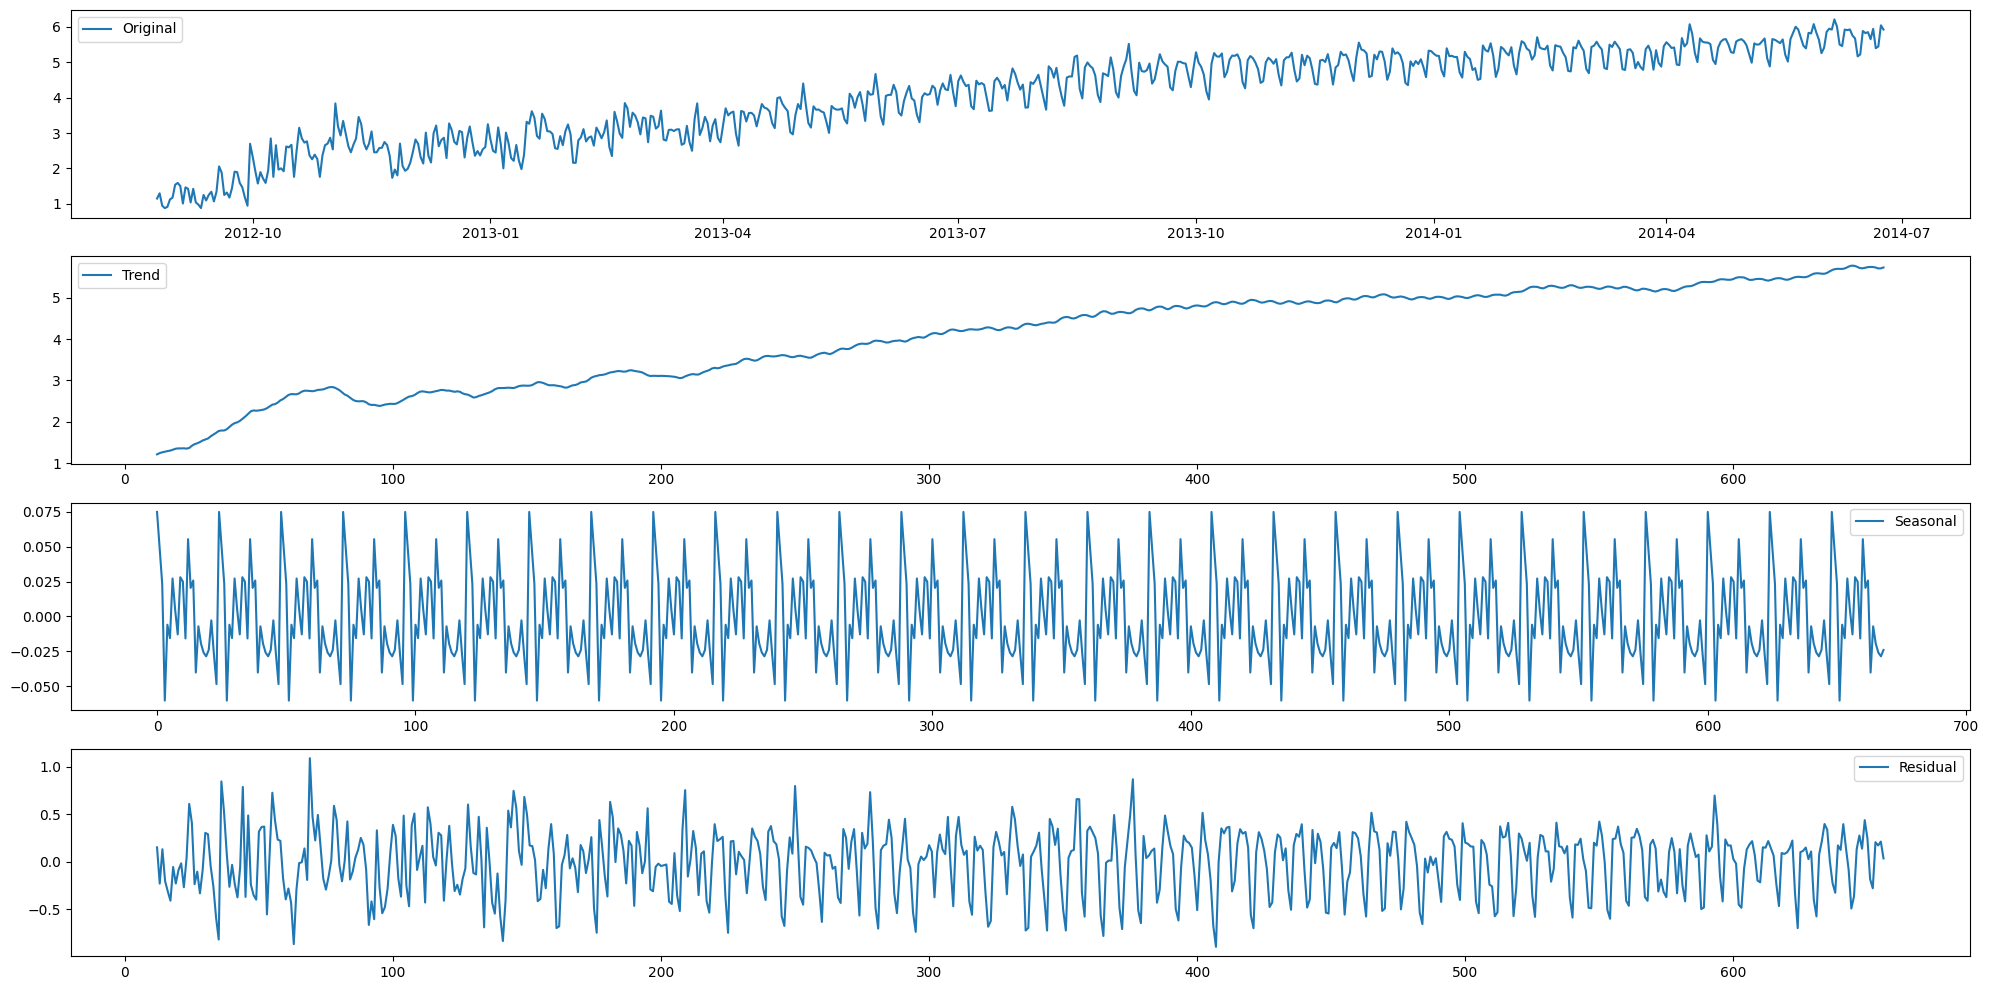

In [75]:
# removing seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(pd.DataFrame(Train_log).Count.values,period=24)

# assigning the trend,seasonal and residual values
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

# plot the graph
plt.subplot(411)
plt.plot(Train_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show();


We can see the trend, residuals and the seasonality clearly in the above graph. Seasonality shows a stable trend.

Lets check stationarity of residuals.

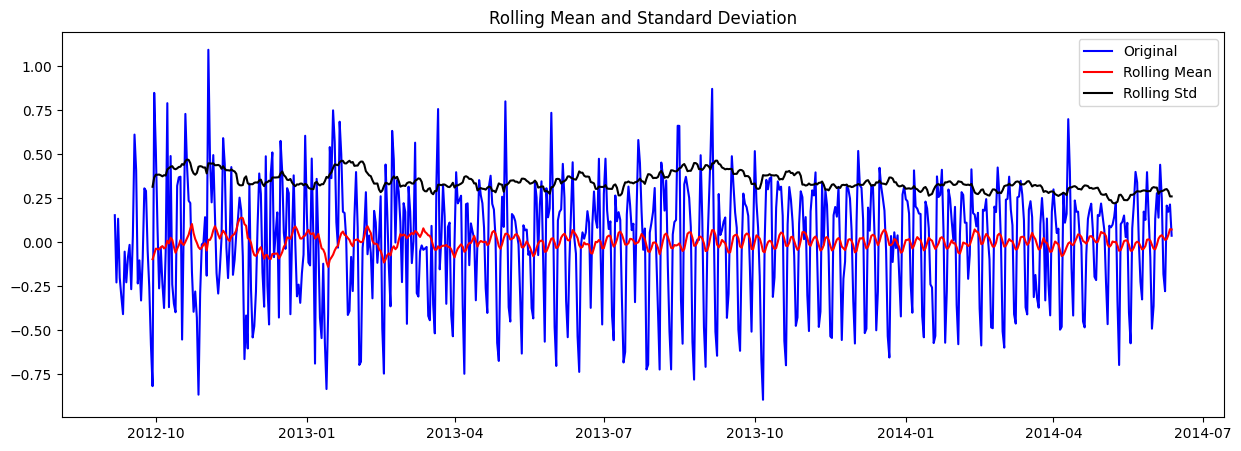

Results of Dickey Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [76]:
# Now we will plot stationarity of the residual part
train_log_decompose=pd.DataFrame(residual)
train_log_decompose['date']=Train_log.index
train_log_decompose.set_index('date',inplace=True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

* It can be interpreted from the above graph that the residuals are stationary. 
* Now we will forecast the time series using ARIMA.

## Forecasting using ARIMA
* First of all we will fit the ARIMA model on our time series for that we have to find the optimized values for the p,d,q parameters of the ARIMA model, we will use ACF and PACF plot to get the p and q value.
* ACF is the plot of total correlation between different lag functions upto a given lag value, whereas PACF is the plot of autocorrelation between two points in time excluding the effect of the intermediate lag variables.
* PACF is used to find the optimal value of p whereas ACF is used to find the optimal value of q.

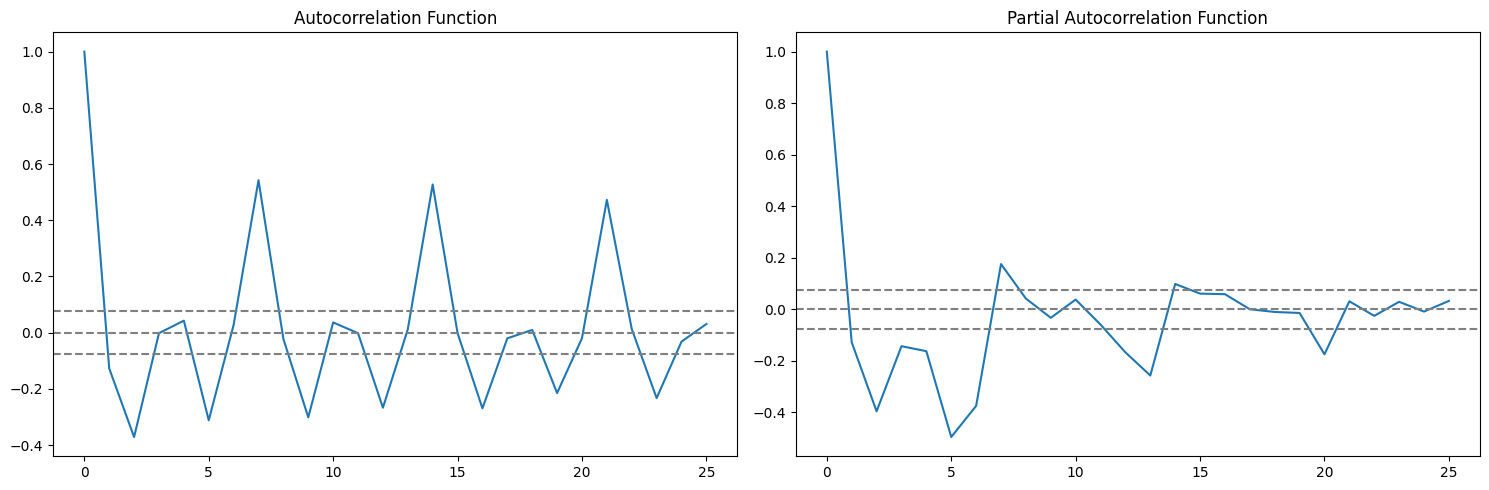

In [77]:
## ACF and PACF plots
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(train_log_diff.dropna(),nlags=25)
lag_pacf=pacf(train_log_diff.dropna(),nlags=25,method='ols')

# plot ACF and PACF
plt.figure(figsize=(15,5))
# ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show();

p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.

q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

Now we will make the ARIMA model as we have the p,d and q values. We will make two models, one with p,d and q values as (2,1,2) and another with (2,1,4) as p,d and q values.

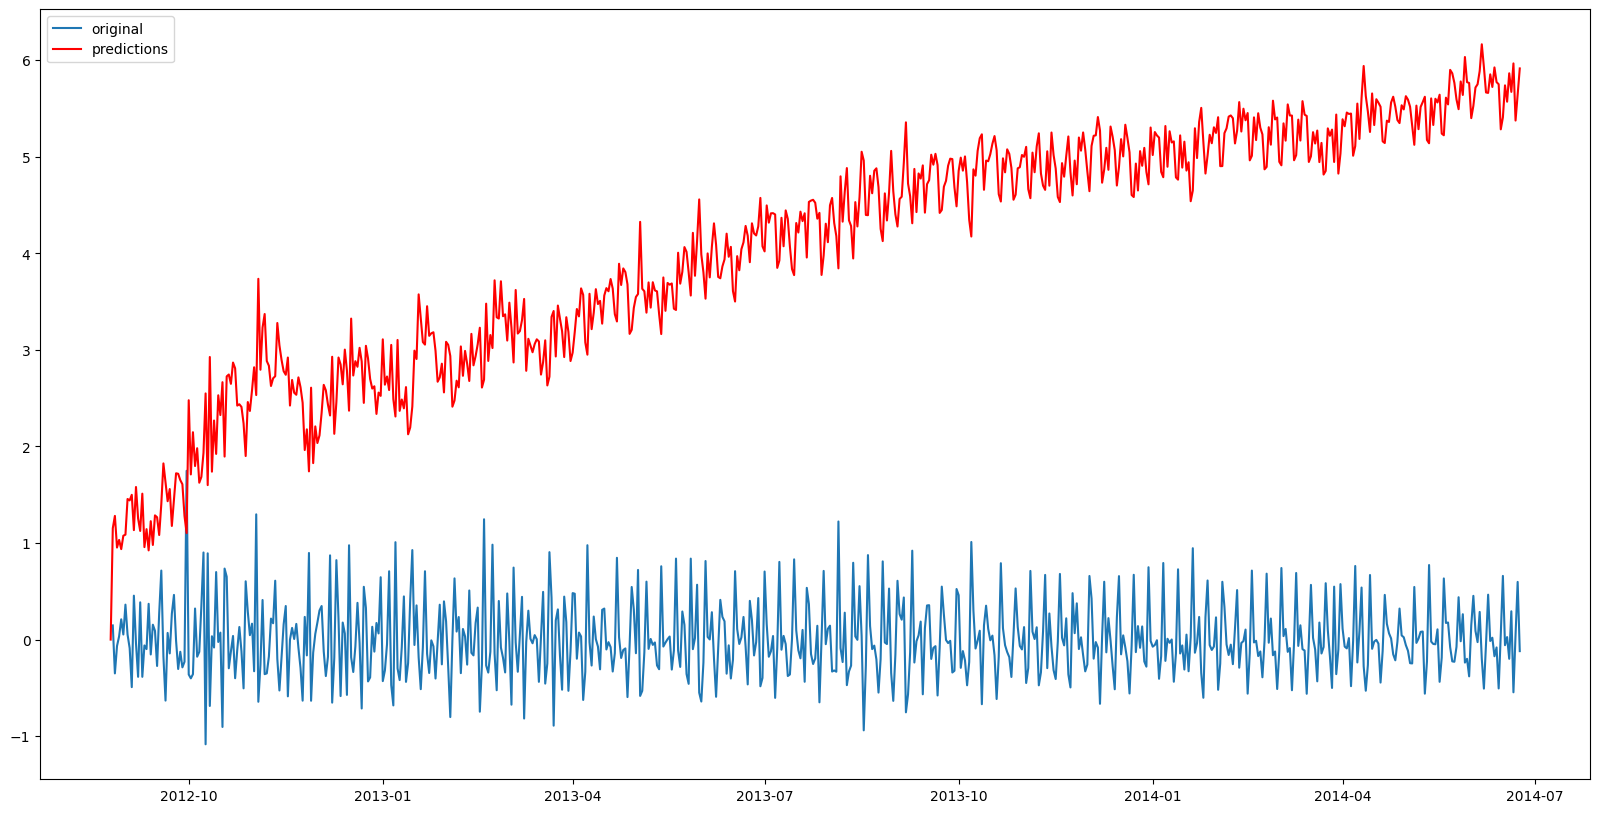

In [81]:
# AR model
from statsmodels.tsa.arima.model import ARIMA

# AR model
model=ARIMA(Train_log,order=(2,1,0)) # here the q value is zero since it is just the AR model
results_AR=model.fit()
plt.plot(train_log_diff.dropna(),label='original')
plt.plot(results_AR.fittedvalues,color='red',label='predictions')
plt.legend(loc='best')
plt.show();


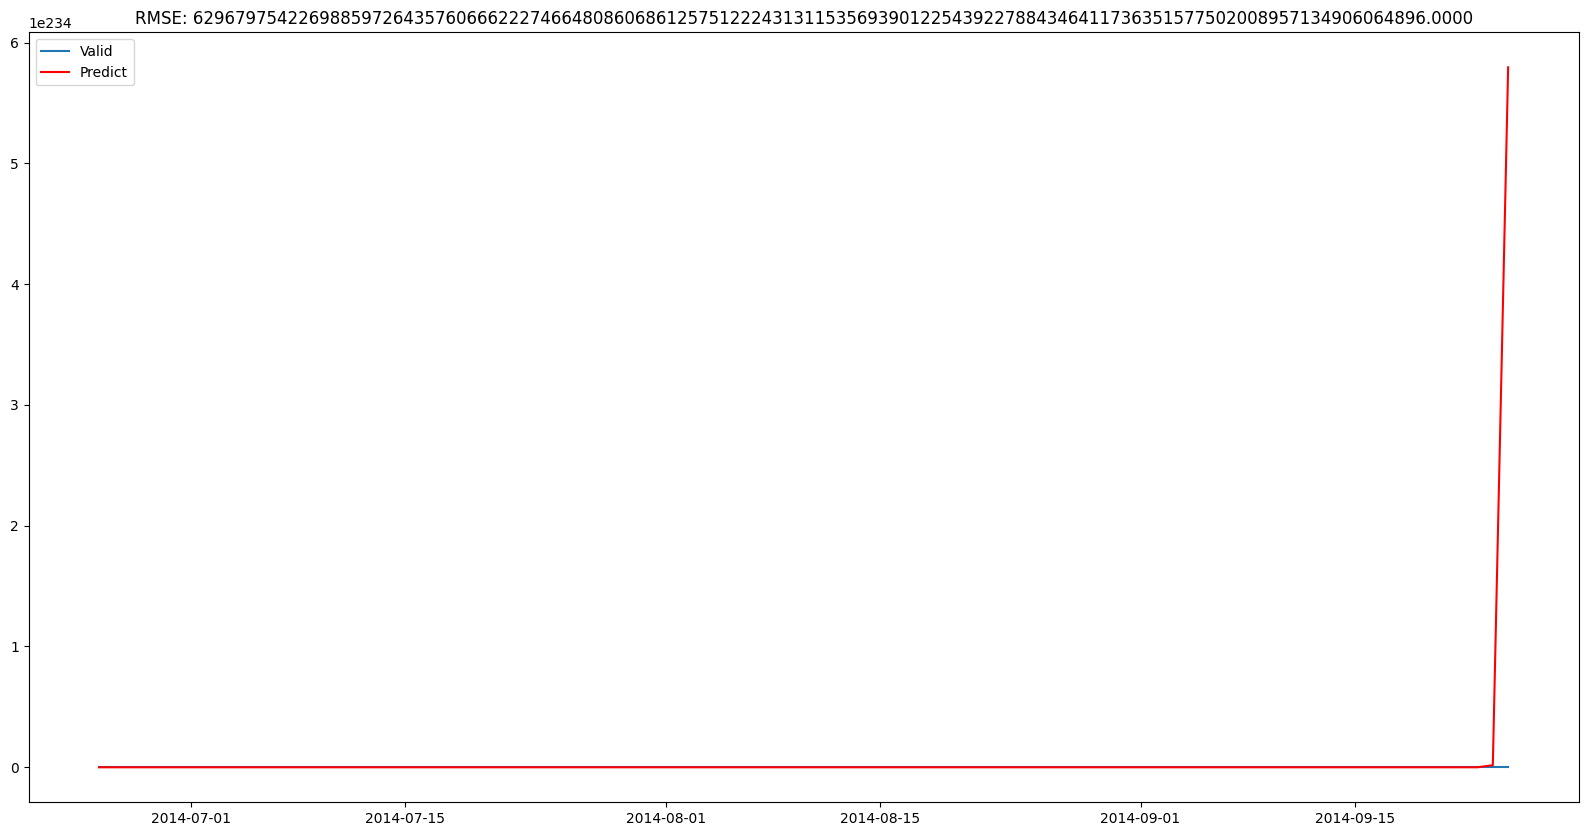

In [83]:
# validation of AR model
AR_predict=results_AR.predict(start='2014-06-25',end='2014-09-25')
AR_predict=AR_predict.cumsum().shift().fillna(0) # converting the results to log scale
AR_predict1=pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0],index=valid.index) # taking the first value of the train data set as the starting point
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict=np.exp(AR_predict1)

# plot the results
plt.plot(valid['Count'],label='Valid')
plt.plot(AR_predict,label='Predict', color='red')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict,valid['Count']))/valid.shape[0]))
plt.show();

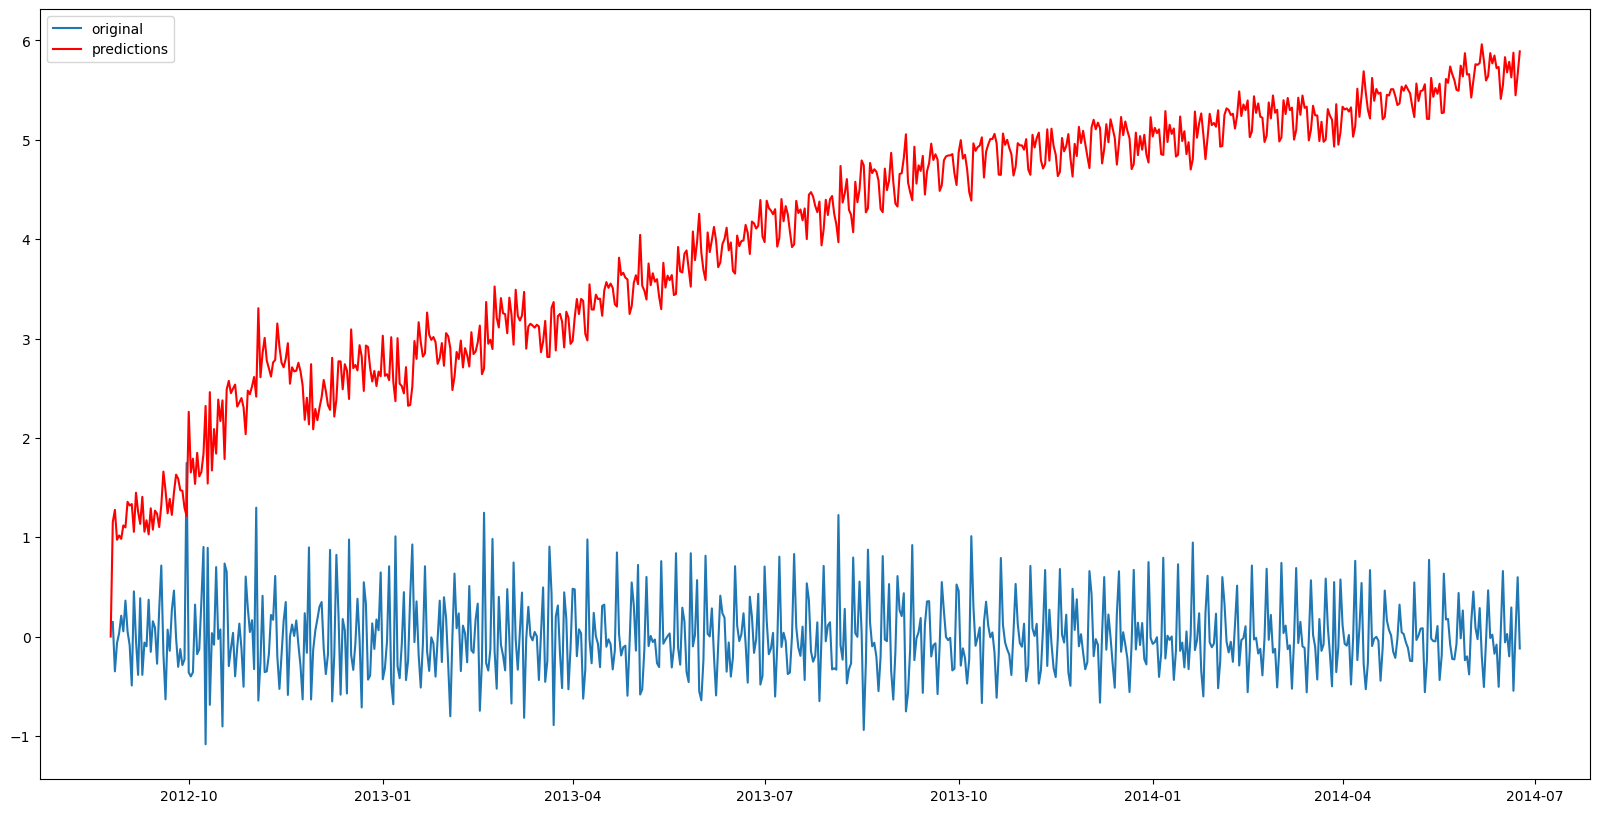

In [84]:
# Moving Average model
model=ARIMA(Train_log,order=(0,1,2)) # here the p value is zero since it is just the MA model
results_MA=model.fit()
plt.plot(train_log_diff.dropna(),label='original')
plt.plot(results_MA.fittedvalues,color='red',label='predictions')
plt.legend(loc='best')
plt.show();

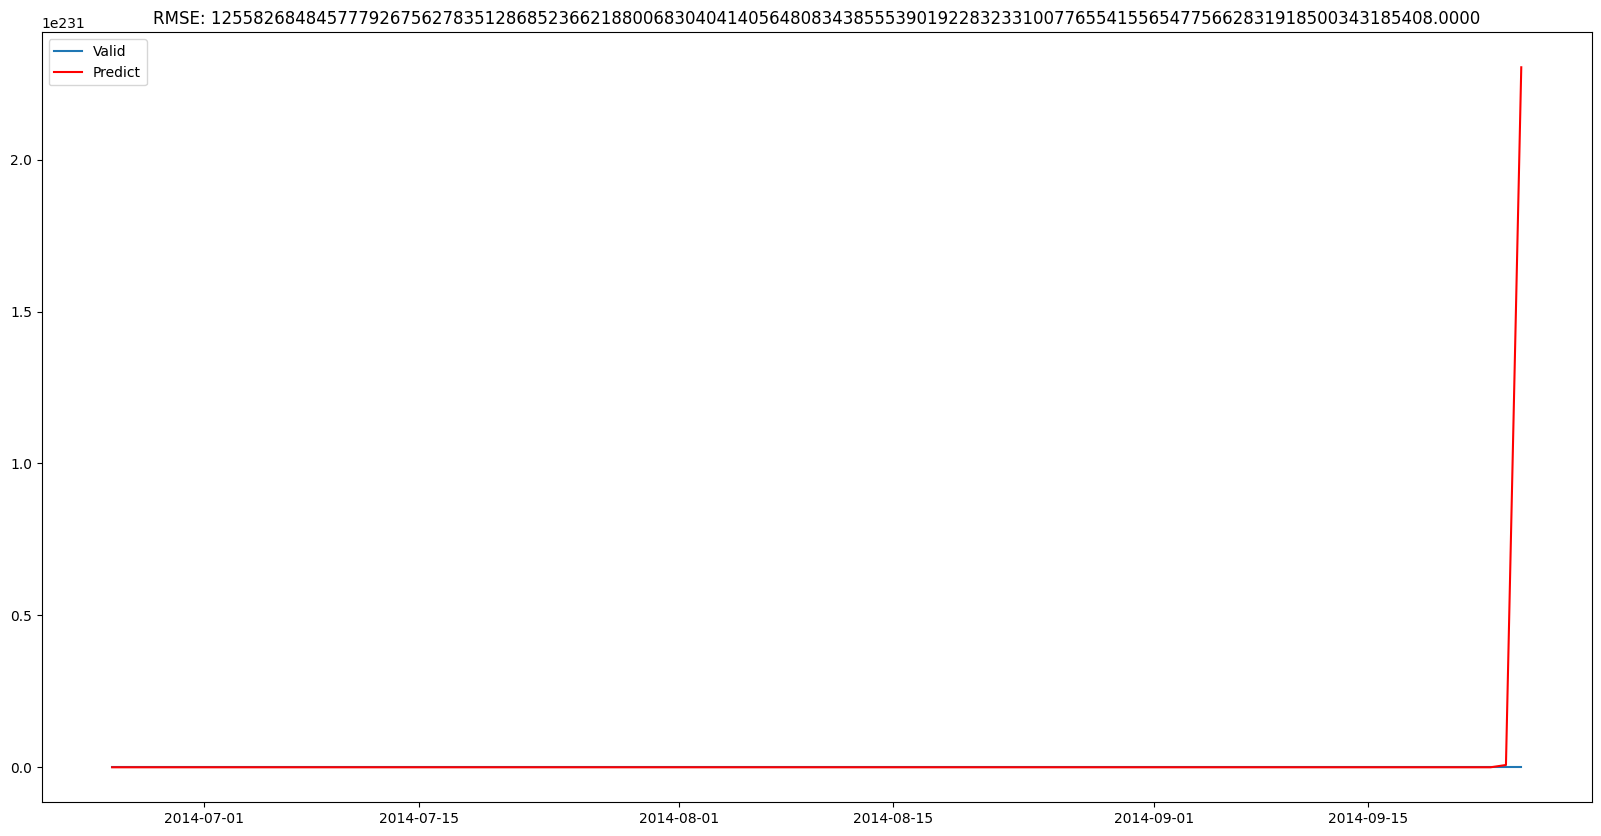

In [85]:
# prediction of MA model
MA_predict=results_MA.predict(start='2014-06-25',end='2014-09-25')
MA_predict=MA_predict.cumsum().shift().fillna(0) # converting the results to log scale
MA_predict1=pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0],index=valid.index) # taking the first value of the train data set as the starting point
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict=np.exp(MA_predict1)

# plot the results
plt.plot(valid['Count'],label='Valid')
plt.plot(MA_predict,label='Predict', color='red')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict,valid['Count']))/valid.shape[0]))
plt.show();

#

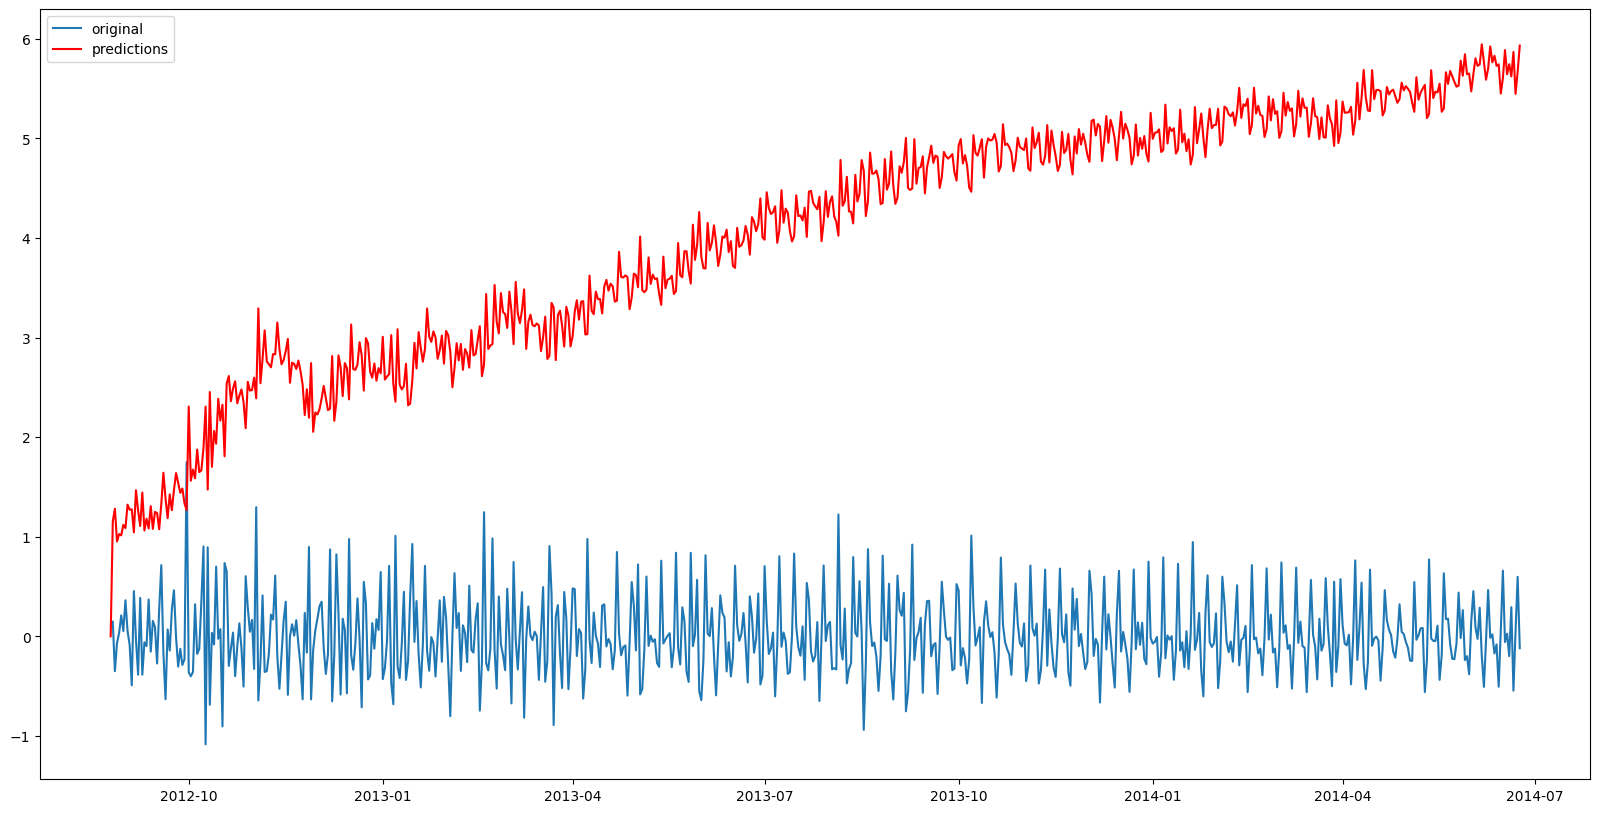

In [95]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already defined Train_log and train_log_diff

# Fit the ARIMA model
model = ARIMA(Train_log, order=(2, 1, 2))
results_ARIMA = model.fit()

# Plot the original data and predictions
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()


In [98]:
# function to change the scale of the model to original scale
def check_prediction_diff(prediction,first_value):
    prediction=prediction.cumsum().shift().fillna(0)
    prediction1=pd.Series(np.ones(prediction.shape[0])*first_value,index=prediction.index)
    prediction1=prediction1.add(prediction,fill_value=0)
    prediction1=np.exp(prediction1)

    plt.plot(first_value['Count'],label='Train')
    plt.plot(valid['Count'],label='Valid')
    plt.plot(prediction1,label='Predict',color='red')
    plt.legend(loc='best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(prediction1,valid['Count']))/valid.shape[0]))
    plt.show();

# prediction of ARIMA model
ARIMA_predict_diff=results_ARIMA.predict(start='2014-06-25',end='2014-09-25')
check_prediction_diff(ARIMA_predict_diff,Train['Count'][23])

IndexError: invalid index to scalar variable.